# Práctica clínica en Medicina Nuclear y Radiofarmacia para Radiofarmacos PET 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Paquete de tiempo
import datetime

from datetime import time
from datetime import timedelta




### Cargar Datos #### 

### Datos Radiofarmacos PET 2019
#data= pd.read_csv('PET.txt', delim_whitespace =True)
data = pd.read_csv('fdgdrl.txt', delim_whitespace =True, header=None)
#data = pd.read_csv('gapsmadrl.txt', delim_whitespace =True, header=None)
#data = pd.read_csv('gadotadrl.txt', delim_whitespace =True, header=None)
#data = pd.read_csv('galiospetmn.txt', delim_whitespace =True, header=None)

#Datos Fechas Galios 2019-2020
#gadotafecha=pd.read_csv('gadotafecha.txt', delim_whitespace =True)



# create headers list
#### FDG
headers = ["Genero","Peso","Horarec","Actipres","Horadm","Actidosi","Horadosi","Voldosi","Actiny","Horainy", "Operador"]
#### GAPSMA
#headers = ["Genero","Actipres","Horadm","Peso","Actidosi","Horadosi","Actiny","Horainy","Voldosi"]
#### GADOTANOC
#headers = ["Genero","Peso","Actipres","Horadm","Actidosi","Horadosi","Voldosi","Actiny","Horainy"]

data.columns = headers

In [80]:
#para ver los primeros datos
data.head()
#gadotafecha.head()

,Genero,Peso,Horarec,Actipres,Horadm,Actidosi,Horadosi,Voldosi,Actiny,Horainy,Operador
0,F,90,7:38,13.5,8:00,16.7,7:21,1.5,10.87,8:20,Andrea
1,M,74,7:38,11.1,8:30,17.5,7:30,2.6,10.11,8:50,Andrea
2,M,55,9:00,8.3,9:00,13.8,7:38,2,7.24,11:08,Andrea
3,F,62,10:00,9.3,9:30,15.8,8:15,2,7.97,9:51,Andrea
4,F,60,10:00,9.0,10:30,21,8:26,2,6.54,10:39,Andrea


In [81]:
data.describe()

,Actipres
count,1190.000000
mean,9.627034
std,2.234443
min,2.400000
25%,8.300000
50%,9.600000
75%,11.100000
max,15.000000


In [82]:
#######   INSERTAR FECHAS DE GALIOS

#data['Fecha']=gadotafecha['Fecha']

In [83]:
### Half life PET radionuclides

##############################
########   F- 18  ###########
### half life [min]
HLF= 110
### Lambda
LambdaF= np.log(2)/HLF

##############################
########   Ga- 68  ###########
### half life [min]
HLGa= 67.83
### Lambda
LambdaGa= np.log(2)/HLGa

In [84]:
data.dtypes
#### Cuantos datos por radiofarmaco
#data["Radiofarmaco"].value_counts()

Genero       object
Peso         object
Horarec      object
Actipres    float64
Horadm       object
Actidosi     object
Horadosi     object
Voldosi      object
Actiny       object
Horainy      object
Operador     object
dtype: object

In [85]:
len(data['Genero'])

1190

In [86]:
#replace NP to NaN
data.replace("NP", np.nan, inplace = True)

In [87]:
data[["Actidosi"]] = data[["Actidosi"]].astype("float")
data[["Actiny"]] = data[["Actiny"]].astype("float")

In [88]:
import seaborn as sns

# Tiempos en la práctica PET 

## ELAPSED TIME 

In [89]:
#data[['Horadm','Horarec','Horadosi','Horainy']].describe()
data[['Horadm','Horadosi','Horainy']].describe()

,Horadm,Horadosi,Horainy
count,1189,1178,1163
unique,90,385,366
top,7:30,7:05,11:00
freq,75,14,28


### Test de consistencia

Revisión de la consistencia temporal de eventos en la práctica clínica de administración de radiofarmacos para toma de imagenes de apoyo diagnóstico PET/CT

In [90]:
### Test Consistencia
## No es posible que la hora de inyección ocurra antes de la hora de recepción del bulto

### Hora de recepción y Hora de inyección
### FDG
timeIR = data.filter(items=['Horainy', 'Horarec'])

########################################
##### METODO 1 Task Group 181  ########
#######################################

## No es posible que la hora de inyección ocurra antes de la hora de dosificación
### Hora de dosificación y Hora de inyección 
timeID=data.filter(items=['Horainy', 'Horadosi','Actidosi','Actipres'])

In [91]:
#Limpieza de datos con NaN en casilla para test de consistencia

###### Inyección recepción
timeIR.dropna(subset=["Horainy","Horarec"],axis=0,inplace=True)

###### Inyección-Dosificación
timeID.dropna(subset=["Horainy","Horadosi","Actidosi","Actipres"], axis=0, inplace=True)

# reset index, because we droped rows
timeIR.reset_index(drop=True,inplace=True)
timeID.reset_index(drop=True, inplace=True)

In [92]:
#timeIR.describe()
timeID.describe()

,Actidosi,Actipres
count,1151.000000,1151.000000
mean,24.015456,9.604796
std,13.964406,2.239820
min,1.400000,2.400000
25%,14.250000,8.300000
50%,20.200000,9.600000
75%,30.800000,11.100000
max,99.100000,15.000000


In [93]:
##### HORAS EN FORMATO DE 24 H 
##### MINUTOS EN FORMATO DE 60 

###### Hora de recepción consistencia
recc = pd.to_datetime(timeIR["Horarec"],format='%H:%M')
###### Hora de inyección cosistencia 
inyc = pd.to_datetime(timeIR["Horainy"],format='%H:%M')

##### Hora de inyección-test ########
inyt = pd.to_datetime(timeID["Horainy"],format='%H:%M')

##### Hora de dosificación-test ########
dosit = pd.to_datetime(timeID["Horadosi"],format='%H:%M')

In [94]:
#### Elapsed time
## Si el tiempo es negativo -> Se realizo la recepción y dosificación despues de inyectar
## Lo cual no tiene sentido

#### Tiempo transcurrido entre la hora de inyección y la hora de recepción 
IR=inyc-recc

#### Tiempo transcurrido entre la hora de inyección y la hora de dosificación
ID=inyt-dosit

In [95]:
####### Tiempo inyección y recepción 
listaIR=IR.dt.days<0        
tiempoirecc=IR.dt.seconds
for i in range(len(listaIR)):   
    if listaIR[i]:
        IR[i]=abs(inyc[i]-recc[i])
        
tiempoirecc=IR.dt.seconds/60     
        
for i in range(len(listaIR)):   
    if listaIR[i]:
        tiempoirecc[i]= tiempoirecc[i]*(-1) 


####### Tiempo inyección y dosificación  
listaID=ID.dt.days<0        
tiempoidosi=ID.dt.seconds
for i in range(len(listaID)):   
    if listaID[i]:
        ID[i]=abs(inyt[i]-dosit[i])
        
tiempoidosi=ID.dt.seconds/60     
        
for i in range(len(listaID)):   
    if listaID[i]:
        tiempoidosi[i]= tiempoidosi[i]*(-1) 

In [96]:
#tiempoirecc.describe()
tiempoidosi.describe()

count    1151.000000
mean      128.124240
std        89.475035
min      -288.000000
25%        68.000000
50%       123.000000
75%       186.500000
max       444.000000
dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'FDG')

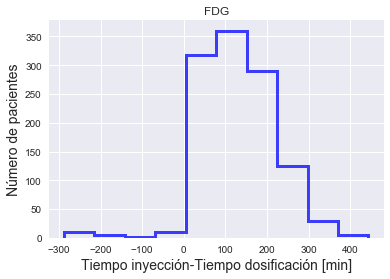

In [97]:
sns.distplot(tiempoidosi,bins=10,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 0.75, "color": "b"})
#sns.distplot(tiempointer,norm_hist=True,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
#"alpha": 1, "color": "b"})
plt.ylabel('Número de pacientes',fontsize=14)
#plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Tiempo inyección-Tiempo dosificación [min]',fontsize=14)
plt.title('FDG')
#plt.savefig('fdgpresdosi.pdf',bbox_inches = "tight")

In [98]:
timeIR['tiempoirecc']=tiempoirecc
timeID['tiempoidosi']=tiempoidosi

In [99]:
#len(timeIR[(timeIR['tiempoirecc'])<0])
len(timeID[(timeID['tiempoidosi'])>0])

1128

In [100]:
#### Para ver datos sospechosos
#timeID[(timeID['tiempoidosi'])<0]

In [101]:
#Localización y conversión a Not a Number NaN
timeID.loc[(timeID['tiempoidosi'])<0]= np.nan

# simply drop whole row with NaN in "timeID" column
timeID.dropna(subset=["tiempoidosi"], axis=0, inplace=True)

In [102]:
## Decay Factor Correction
DF=np.exp(-LambdaF*timeID['tiempoidosi'])

In [103]:
#### Correcion actividad dosificada a hora de inyeccion 
timeID['CActdosiny']=timeID['Actidosi']*DF

In [104]:
timeID.dtypes

Horainy         object
Horadosi        object
Actidosi       float64
Actipres       float64
tiempoidosi    float64
CActdosiny     float64
dtype: object

In [105]:
timeID["desviasigno"]=((timeID["CActdosiny"]-timeID["Actipres"])*100)/timeID["Actipres"]

In [106]:
timeID["desviasigno"].describe()

count    1128.000000
mean       -2.708751
std        16.543726
min       -95.171097
25%        -9.157051
50%        -0.793556
75%         6.017100
max        60.563013
Name: desviasigno, dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Proporción de Pacientes')

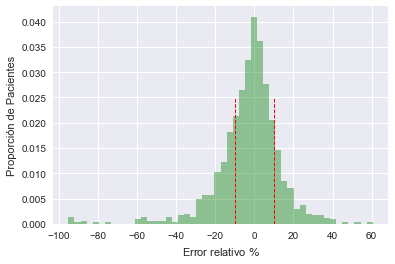

In [107]:
sns.distplot(timeID['desviasigno'],norm_hist=True,kde=False,color='g',label='Actividad Inyectada')
plt.plot((10, 10),(0,0.025), '--r', linewidth=1) 
plt.plot((-10, -10),(0,0.025), '--r', linewidth=1) 
plt.xlabel('Error relativo $\%$')
plt.ylabel('Proporción de Pacientes')
#plt.savefig('errorrelgadota.pdf',bbox_inches = "tight")

## Primer metodo: Tiempo de prescripcion respecto a tiempo de inyeccion

In [108]:
### Hora de Prescripción y Hora de recepción
timePR = data.filter(items=['Horadm', 'Horarec'])
### Hora de Prescripción y Hora de inyección
timePI=data.filter(items=['Horadm', 'Horainy','Actipres'])
### Hora de Prescripción y Hora de dosificación
timePD=data.filter(items=['Horadm', 'Horadosi'])

In [109]:
### Prescripción y Recepción
timePR.dropna(subset=["Horadm","Horarec"], axis=0, inplace=True)
### Prescripción e Inyección
timePI.dropna(subset=["Horadm","Horainy","Actipres"], axis=0, inplace=True)
### Prescripción y Dosificación
timePD.dropna(subset=["Horadm","Horadosi"], axis=0, inplace=True)

# reset index, because we droped rows
timePR.reset_index(drop=True, inplace=True)
timePI.reset_index(drop=True, inplace=True)
timePD.reset_index(drop=True, inplace=True)

In [110]:
#timePR.describe()
#timePI.describe()
#timePD.describe()
#timeID


In [111]:
##### HORAS EN FORMATO DE 24 H 
##### MINUTOS EN FORMATO DE 60 

#############################################################
##### Hora para la que esta "calibrada la actividad" ########
presPR = pd.to_datetime(timePR["Horadm"],format='%H:%M')
presI = pd.to_datetime(timePI["Horadm"],format='%H:%M')
presD = pd.to_datetime(timePD["Horadm"],format='%H:%M')

############################################################
##### Hora de recepción del bulto en MN ########
rec = pd.to_datetime(timePR["Horarec"],format='%H:%M')


############################################################
##### Hora de inyección ########
iny = pd.to_datetime(timePI["Horainy"],format='%H:%M')

############################################################
##### Hora de dosificación ########
dosi = pd.to_datetime(timePD["Horadosi"],format='%H:%M')

In [112]:
#### Elapsed time

#### Tiempo transcurrido entre la hora prescrita y la hora de recepción 
PR=presPR-rec

#### Tiempo transcurrido entre la hora prescrita y la hora de inyección 
PI=presI-iny

#### Tiempo transcurrido entre la hora prescrita y la hora de dosificación
PD=presD-dosi

#subgroup=pd.DataFrame(data=timePR)
#headers = ["timePR"]
#subgroup.columns = headers
#subgroup

## Si el tiempo es negativo -> Recepción tarde! -> Asignar variable Categorica

In [113]:
#PI
#PR
#PD

In [114]:
####### Tiempo prescripción y recepción
listaPR=PR.dt.days<0
tiempointer=PR.dt.seconds

for i in range(len(listaPR)):   
    if listaPR[i]:
        PR[i]=abs(presPR[i]-rec[i])

tiempointer=PR.dt.seconds/60     
        
for i in range(len(listaPR)):   
    if listaPR[i]:
        tiempointer[i]= tiempointer[i]*(-1) 
        
####### Tiempo prescripción e inyección       
listaPI=PI.dt.days<0        
tiempopiny=PI.dt.seconds
for i in range(len(listaPI)):   
    if listaPI[i]:
        PI[i]=abs(presI[i]-iny[i])
        
tiempopiny=PI.dt.seconds/60     
        
for i in range(len(listaPI)):   
    if listaPI[i]:
        tiempopiny[i]= tiempopiny[i]*(-1) 
        
####### Tiempo prescripción y dosificación       
listaPD=PD.dt.days<0        
tiempopdosi=PD.dt.seconds
for i in range(len(listaPD)):   
    if listaPD[i]:
        PD[i]=abs(presD[i]-dosi[i])
        
tiempopdosi=PD.dt.seconds/60     
        
for i in range(len(listaPD)):   
    if listaPD[i]:
        tiempopdosi[i]= tiempopdosi[i]*(-1)        

In [115]:
#tiempopdosi
#tiempointer
#tiempopiny

count    1162.000000
mean      -13.951807
std        25.501369
min      -353.000000
25%       -20.000000
50%        -9.000000
75%         0.000000
max        52.000000
dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'FDG')

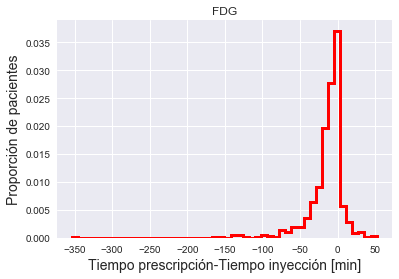

In [117]:
sns.distplot(tiempopiny,norm_hist=True,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "r"})
#sns.distplot(tiempointer,norm_hist=True,kde=False,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
#"alpha": 1, "color": "b"})
plt.ylabel('Proporción de pacientes',fontsize=14)
plt.xlabel('Tiempo prescripción-Tiempo inyección [min]',fontsize=14)
plt.title('FDG')
#plt.savefig('fdgpresdosi.pdf',bbox_inches = "tight")

In [118]:
#tiempointer.describe()
tiempopiny.describe()
#tiempopdosi.describe()

count    1162.000000
mean      -13.951807
std        25.501369
min      -353.000000
25%       -20.000000
50%        -9.000000
75%         0.000000
max        52.000000
dtype: float64

In [119]:
timePI['tiempopiny']=tiempopiny

In [120]:
## Decay Factor Correction
DFPI=np.exp(-LambdaF*timePI['tiempopiny'])

In [121]:
#### Correcion actividad dosificada a hora de inyeccion 
timePI['CActpres']=timePI['Actipres']*DFPI

In [122]:
timePI.dtypes

Horadm         object
Horainy        object
Actipres      float64
tiempopiny    float64
CActpres      float64
dtype: object

In [123]:
timePI["desviasigno"]=((timePI["CActpres"]-timePI["Actipres"])*100)/timePI["Actipres"]

In [124]:
timePI["desviasigno"].describe()

count    1162.000000
mean       11.052704
std        31.259451
min       -27.939892
25%         0.000000
50%         5.835101
75%        13.431252
max       824.767636
Name: desviasigno, dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Proporción de Pacientes')

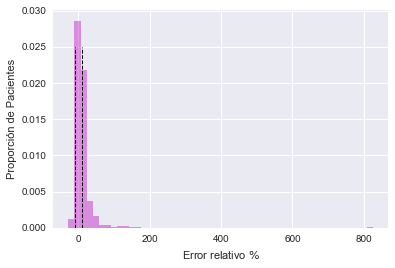

In [126]:
sns.distplot(timePI['desviasigno'],norm_hist=True,kde=False,color='m',label='Actividad Inyectada')
plt.plot((10, 10),(0,0.025), '--k', linewidth=1) 
plt.plot((-10, -10),(0,0.025), '--k', linewidth=1) 
plt.xlabel('Error relativo $\%$')
plt.ylabel('Proporción de Pacientes')
#plt.savefig('errorrelgadota.pdf',bbox_inches = "tight")

### Desviación de Actividad Inyectada

In [27]:
data[["Actiny"]] = data[["Actiny"]].astype("float")
data[["Actipres"]] = data[["Actipres"]].astype("float")
data[["Actidosi"]] = data[["Actidosi"]].astype("float")
#data[["Voldosi"]] = data[["Voldosi"]].astype("float")
data.dtypes

Genero       object
Peso         object
Actipres    float64
Horadm       object
Actidosi    float64
Horadosi     object
Voldosi      object
Actiny      float64
Horainy      object
Fecha        object
dtype: object

In [28]:
data["desviasigno"]=((data["Actiny"]-data["Actipres"])*100)/data["Actipres"]

In [29]:
### Error relativo porcentual entre Actividad prescrita y actividad inyectada 
data["desvia"]=np.absolute(((data["Actiny"]-data["Actipres"])*100)/data["Actipres"])

In [30]:
data["desviasigno"].describe()

count    148.000000
mean      -3.176383
std       27.017272
min      -56.410256
25%      -19.852941
50%       -2.086957
75%       13.095109
max       89.000000
Name: desviasigno, dtype: float64

In [31]:
len(data[(data['desviasigno'])<=-10.0])

55

In [32]:
len(data[(np.absolute(data['desviasigno'])<=20.0)])

93

In [33]:
data['desviasigno'].std()

27.017271921770966

In [36]:
data.dropna(subset=["Actiny"], axis=0, inplace=True)
data.dropna(subset=["Actipres"], axis=0, inplace=True)
data.dropna(subset=["Fecha"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [37]:
data.describe()

,Actipres,Actidosi,Actiny,desviasigno,desvia
count,148.000000,141.000000,148.000000,148.000000,148.000000
mean,4.225000,5.588014,3.980878,-3.176383,20.333089
std,0.922793,2.008737,1.070405,27.017272,17.995668
min,2.500000,2.600000,1.700000,-56.410256,0.000000
25%,3.300000,4.200000,3.145000,-19.852941,7.175532
50%,4.400000,5.300000,3.875000,-2.086957,15.270833
75%,4.900000,6.300000,4.740000,13.095109,28.701299
max,5.500000,12.200000,6.700000,89.000000,89.000000


/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


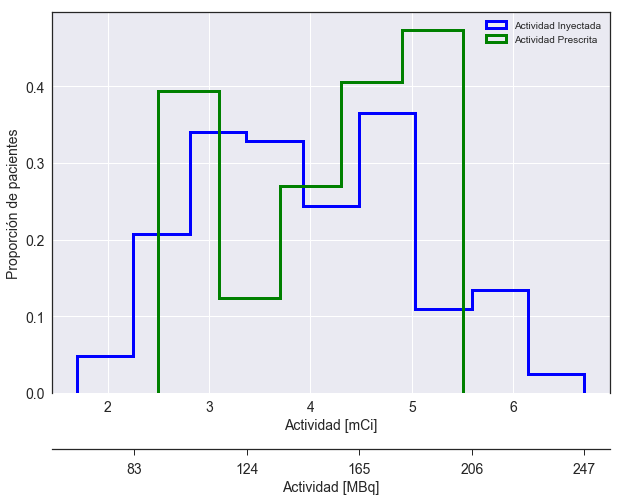

In [39]:
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data['Actiny'],norm_hist=True,kde=False,ax=ax1,label='Actividad Inyectada',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "b"})
sns.distplot(data['Actipres'],norm_hist=True,kde=False,ax=ax1, label='Actividad Prescrita',hist_kws={"histtype": "step", "linewidth": 3,
"alpha": 1, "color": "g"})

################################ 
#########  FDG  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
#plt.plot((9.0, 9.0),(0,0.25), '--r', linewidth=2,label='DRL-Inyectada')


################################ 
#########  GAPSMA  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
#plt.plot((4.46, 4.46),(0,0.6), '--r', linewidth=2,label='DRL-Inyectada')

################################ 
#########  GADOTANOC  ################
#plt.plot((20, 20),(0,0.25), '--k', linewidth=1) 
#plt.plot((4, 4),(0,0.25), '--k', linewidth=1) 
#plt.plot((3.88, 3.88),(0,0.4), '--r', linewidth=2,label='DRL-Inyectada')


#ax1.set_title('$^{18}$F-FDG',fontsize=14)
#ax1.set_title('$^{68}$Ga-PSMA',fontsize=14)
#ax1.set_title('$^{68}$Ga-DOTA',fontsize=14)
ax1.set_ylabel('Proporción de pacientes',fontsize=14)
ax1.set_xlabel('Actividad [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
ax1.legend(loc='upper right')
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data['Actiny'].min(),data['Actiny'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)


#plt.savefig('gadotadrl.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Proporción de Pacientes')

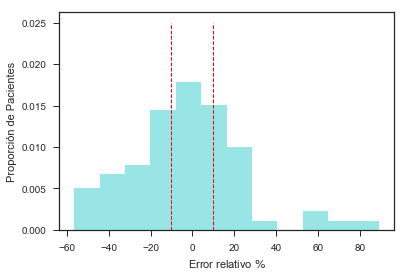

In [40]:
sns.distplot(data['desviasigno'],norm_hist=True,kde=False,color='c',label='Actividad Inyectada')
plt.plot((10, 10),(0,0.025), '--r', linewidth=1) 
plt.plot((-10, -10),(0,0.025), '--r', linewidth=1) 
plt.xlabel('Error relativo $\%$')
plt.ylabel('Proporción de Pacientes')
#plt.savefig('errorrelgadota.pdf',bbox_inches = "tight")

ImportError: No module named 'plotly'

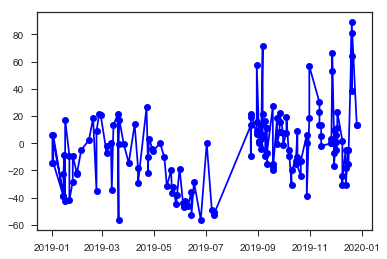

In [51]:
#h=pd.to_datetime(data["Fecha"],format="%d/%m/%Y")
plt.plot(h,data['desviasigno'],'bo-')

0     2019-01-01
1     2019-01-01
2     2019-01-14
3     2019-01-02
4     2019-01-02
5     2019-01-14
6     2019-01-14
7     2019-01-15
8     2019-01-16
9     2019-01-16
10    2019-01-21
11    2019-01-21
12    2019-01-25
13    2019-01-25
14    2019-01-30
15    2019-01-30
16    2019-02-04
17    2019-02-13
18    2019-02-18
19    2019-02-22
20    2019-02-22
21    2019-02-25
22    2019-02-27
23    2019-03-06
24    2019-03-06
25    2019-03-11
26    2019-03-12
27    2019-03-14
28    2019-03-19
29    2019-03-20
         ...    
118   2019-11-14
119   2019-11-14
120   2019-11-26
121   2019-11-26
122   2019-11-26
123   2019-11-27
124   2019-11-27
125   2019-11-29
126   2019-11-29
127   2019-11-29
128   2019-12-02
129   2019-12-02
130   2019-12-02
131   2019-12-03
132   2019-12-03
133   2019-12-09
134   2019-12-09
135   2019-12-09
136   2019-12-13
137   2019-12-13
138   2019-12-13
139   2019-12-16
140   2019-12-16
141   2019-12-16
142   2019-12-20
143   2019-12-20
144   2019-12-20
145   2019-12-

In [54]:
# simply drop whole row with NaN in "Vol" column
data.dropna(subset=["Voldosi"], axis=0, inplace=True)

# reset index, because we droped one row
data.reset_index(drop=True, inplace=True)

In [56]:
data[["Voldosi"]] = data[["Voldosi"]].astype("float")

In [57]:
especifica=data["Actiny"]/data["Voldosi"]
data['Espiny']= especifica

In [58]:
data.describe()

,Actipres,Actidosi,Voldosi,Actiny,desviasigno,desvia,Espiny
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,9.612517,23.943217,1.805546,8.963976,-6.244628,9.972400,5.410944
std,2.239064,13.960397,0.584042,2.197402,11.842782,8.930089,2.172504
min,2.400000,1.400000,0.500000,2.020000,-51.041667,0.000000,0.545455
25%,8.300000,14.200000,1.500000,7.500000,-12.776511,3.333333,4.000000
50%,9.600000,20.150000,2.000000,8.975000,-6.006159,7.974359,5.000000
75%,11.100000,30.225000,2.000000,10.442500,0.000000,14.271429,6.400000
max,15.000000,99.100000,11.000000,19.300000,76.666667,76.666667,22.300000


/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KeyError: 'Esp'

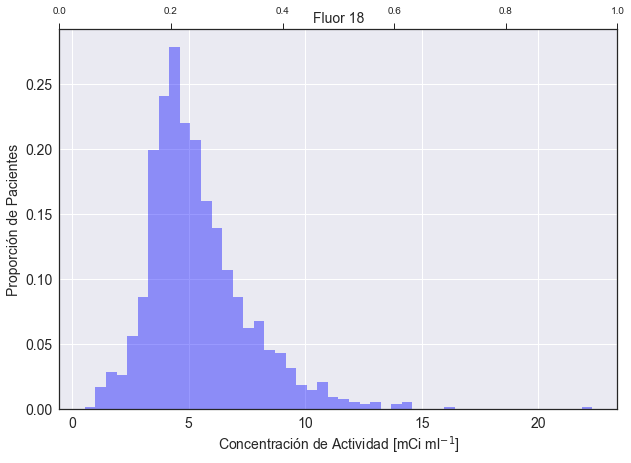

In [59]:
#sns.distplot(data_Gapsma['Esp'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
#sns.distplot(data['Esp'],norm_hist=True,kde=False,color='g',ax=ax1)
#sns.distplot(data['Esppres'],norm_hist=True,kde=False,color='b',ax=ax1)
sns.distplot(data['Espiny'],norm_hist=True,kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('Fluor 18',fontsize=14)
ax1.set_ylabel('Proporción de Pacientes',fontsize=14)
ax1.set_xlabel('Concentración de Actividad [mCi ml$^{-1}$]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data['Esp'].min(),data['Esp'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Concentración de Actividad  [MBq ml$^{-1}$]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)
plt.savefig('FDGcon.pdf',bbox_inches = "tight")

### Diagnostic Reference Level 

Comparar con guías internacionales: Europea (SNMMI) y no se que otra. Los valores de actividad a administrar por RF de diagnostico en PET.

In [60]:
##########  Agrupando por examen #########
#data_group_exam = data.groupby(['Radiofarmaco'],as_index=False)

######### FDG ##########
#FDG= data_group_exam.get_group('FDG')

######### GADOTA  ##########
#GADOTA= data_group_exam.get_group('GADOTA')

######### GAPSMA  ##########
#GAPSMA= data_group_exam.get_group('GADOTA')

In [61]:
data.dropna(subset=["Actiny"], axis=0, inplace=True)
data.dropna(subset=["Actiny"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [62]:
data['Actiny'].describe()

count    1172.000000
mean        8.963976
std         2.197402
min         2.020000
25%         7.500000
50%         8.975000
75%        10.442500
max        19.300000
Name: Actiny, dtype: float64

In [63]:
import seaborn as sns

In [65]:
######## Estadisticos FDG F-18
#FDG['ActivIny'].describe()
data[['Actiny','Actipres']].describe()

,Actiny,Actipres
count,1172.000000,1172.000000
mean,8.963976,9.612517
std,2.197402,2.239064
min,2.020000,2.400000
25%,7.500000,8.300000
50%,8.975000,9.600000
75%,10.442500,11.100000
max,19.300000,15.000000


In [102]:
data['desviasigno'].describe()

count    148.000000
mean      -3.176383
std       27.017272
min      -56.410256
25%      -19.852941
50%       -2.086957
75%       13.095109
max       89.000000
Name: desviasigno, dtype: float64

In [86]:
######## Estadisticos GADOTA Ga-68
#GADOTA['ActivIny'].describe()

In [87]:
######## Estadisticos GAPSMA Ga-68
#GAPSMA['ActivIny'].describe()

In [88]:
#data.dtypes

In [89]:
#replace NV to NaN
#data.replace("NV", np.nan, inplace = True)

In [90]:
#data.dtypes

In [91]:
#data[["ActivAdm"]] = data[["ActivAdm"]].astype("float")

In [92]:
#data.dropna(subset=["ActivAdm"], axis=0, inplace=True)

In [93]:
#data.reset_index(drop=True, inplace=True)

### Diferencia entre actividad prescrita e inyectada 

\begin{equation}
\%=\frac{(\text{Actividad Prescrita}-\text{Actividad Inyectada})\times 100}{\text{Actividad Prescrita}}
\end{equation}

Aquí Actividad Inyectada = Actividad Pre-jeringa -Actividad Post Jeringa

In [94]:
##Diferencia
#perce=np.absolute(((data['ActivAdm']-data['ActivIny'])*100)/data['ActivAdm'])

In [95]:
#percent=round(perce,1)

In [96]:
### Ingresar datos en el data 
#data['percent']= percent

In [97]:
data.head()

,Genero,Peso,Horarec,Actipres,Horadm,Actidosi,Horadosi,Voldosi,Actiny,Horainy,Operador,desviasigno,desvia
0,F,90,7:38,13.5,8:00,16.7,7:21,1.5,10.87,8:20,Andrea,-19.481481,19.481481
1,M,74,7:38,11.1,8:30,17.5,7:30,2.6,10.11,8:50,Andrea,-8.918919,8.918919
2,M,55,9:00,8.3,9:00,13.8,7:38,2,7.24,11:08,Andrea,-12.771084,12.771084
3,F,62,10:00,9.3,9:30,15.8,8:15,2,7.97,9:51,Andrea,-14.301075,14.301075
4,F,60,10:00,9.0,10:30,21.0,8:26,2,6.54,10:39,Andrea,-27.333333,27.333333


Altos porcentajes de diferencia entre actividad prescrita y actividad inyectada, pueden tener las siguientes causas asignables:

1. Retraso en la recepción de la actividad porque: radiofarmaco esta en pruebas de control de calidad ó falla  comunicación entre RF-MN  [TIEMPO]
2. El farmaco marcado con Ga-68 es enviado en una lonchera y con un tapón. En el cambio del tapón por la jeringa, es probable que se pierda una cierta cantidad de material (y tiempo)
3. Dificultades tecnicas con el PET, que retrasa el proceso para realizar el estudio [TIEMPO]
4. ¿Actividad residual en jeringa es considerable?
5. Daño en el ascensor

#### Añadir grafico % Dif 

In [98]:
##########  Agrupando por examen #########
#data_group_exam = data.groupby(['Radiofarmaco'],as_index=False)

######### FDG ##########
#FDG= data_group_exam.get_group('FDG')

######### GADOTA  ##########
#GADOTA= data_group_exam.get_group('GADOTA')

In [99]:
#FDG['percent'].describe()

In [115]:
data.dropna(subset=["Horadm"], axis=0, inplace=True)
data.dropna(subset=["Horarec"], axis=0, inplace=True)
data.dropna(subset=["Horadosi"], axis=0, inplace=True)
data.dropna(subset=["Horainy"], axis=0, inplace=True)
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [171]:
#subgroup

In [173]:
#subgroup.loc[subgroup['timePR'].dt.days<0]= np.nan

In [174]:

#subgroup

#subgroup["suma"].dt.seconds

In [175]:
subgroup

,timePR
0,00:22:00
1,00:52:00
2,00:00:00
3,00:30:00
4,00:30:00
5,00:10:00
6,01:10:00
7,01:40:00
8,00:05:00
9,00:10:00


In [176]:
tiempointer=subgroup['timePR'].dt.seconds
#microseconds.values
tiempointer[3]*(-1)

-1800

In [177]:
for i in range(len(lista)):   
    if lista[i]:
        tiempointer[i]= tiempointer[i]*(-1)

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
tiempointer/60

0       22.0
1       52.0
2        0.0
3      -30.0
4       30.0
5       10.0
6       70.0
7      100.0
8       -5.0
9       10.0
10      50.0
11      20.0
12       0.0
13      40.0
14     100.0
15      10.0
16      40.0
17      20.0
18      60.0
19      30.0
20      -8.0
21      30.0
22      70.0
23       0.0
24      10.0
25     -15.0
26      15.0
27      -5.0
28      55.0
29     115.0
       ...  
852      6.0
853     51.0
854     96.0
855    130.0
856    190.0
857      4.0
858     34.0
859     64.0
860    109.0
861    139.0
862    184.0
863     30.0
864     60.0
865     90.0
866    -10.0
867     35.0
868     65.0
869      5.0
870     35.0
871     65.0
872      5.0
873     35.0
874    -10.0
875     35.0
876     80.0
877      0.0
878     45.0
879     90.0
880      5.0
881     65.0
Name: timePR, dtype: float64

In [25]:
#### Tiempo transcurrido entre la hora de inyección y la hora prescrita 
timePI = Inye -pres

In [28]:
timePI

0             00:30:00
1             01:06:00
2             00:31:00
3             00:08:00
4             00:02:00
5             00:05:00
6    -1 days +23:57:00
7    -1 days +23:40:00
8    -1 days +23:35:00
9    -1 days +23:45:00
10            00:25:00
11            00:25:00
dtype: timedelta64[ns]

In [29]:
#### Tiempo transcurrido entre la hora de dosificación y la hora de inyección
timeID = Inye -dosi

In [ ]:
#timeID